In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# df = pd.read_csv("../dataset/full_dataset.csv")
df = pd.read_csv("content/dataset.csv")

In [3]:
df.head()

total_sessions_day0  total_sessions_day1  total_sessions_day3  \
0                  1.0                  1.0                  1.0   
1                  1.0                  1.0                  1.0   
2                  1.0                  2.0                  2.0   
3                  1.0                  1.0                  1.0   
4                  1.0                  1.0                  1.0   

   total_sessions_day7  chapters_finished_day0  chapters_finished_day1  \
0                  1.0                       0                       0   
1                  1.0                       0                       0   
2                  2.0                       0                       0   
3                  1.0                       0                       0   
4                  1.0                       0                       0   

   chapters_finished_day3  chapters_finished_day7  chapters_opened_day0  \
0                       0                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
3                       0                       0                     0   
4                       0                       0                     0   

   chapters_opened_day1  ...  install_date  country_code  ad_ltv_day0  \
0                     0  ...    2021-12-03   COUNTRY_135          0.0   
1                     0  ...    2021-12-03   COUNTRY_141          0.0   
2                     0  ...    2021-12-03   COUNTRY_141          0.0   
3                     0  ...    2021-12-03   COUNTRY_141          0.0   
4                     0  ...    2021-12-03   COUNTRY_203          0.0   

   ad_ltv_day1  ad_ltv_day3  platform  target_sub_ltv_day30  \
0          0.0          0.0       ios                   0.0   
1          0.0          0.0   android                   0.0   
2          0.0          0.0   android                   0.0   
3          0.0          0.0       ios                   0.0   
4          0.0          0.0   android                   0.0   

   target_iap_ltv_day30  target_ad_ltv_day30  target_full_ltv_day30  
0                   0.0                  0.0                    0.0  
1                   0.0                  0.0                    0.0  
2                   0.0                  0.0                    0.0  
3                   0.0                  0.0                    0.0  
4                   0.0                  0.0                    0.0  

[5 rows x 63 columns]

In [4]:
features_with_day = df.columns[[True if "day" in column_name else False for column_name in df]]
features_with_session = df.columns[[True if "session" in column_name and "day" not in column_name else False for column_name in df]]
print(features_with_day, features_with_session)

Index(['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3',
       'total_sessions_day7', 'chapters_finished_day0',
       'chapters_finished_day1', 'chapters_finished_day3',
       'chapters_finished_day7', 'chapters_opened_day0',
       'chapters_opened_day1', 'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1', 'chapters_closed_day3',
       'chapters_closed_day7', 'diamonds_received_day0',
       'diamonds_received_day1', 'diamonds_received_day3',
       'diamonds_received_day7', 'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7', 'app_sub_ltv_day0',
       'app_sub_ltv_day1', 'app_sub_ltv_day3', 'app_iap_ltv_day0',
       'app_iap_ltv_day1', 'app_iap_ltv_day3', 'ad_ltv_day0', 'ad_ltv_day1',
       'ad_ltv_day3', 'target

In [5]:
np.unique(df["install_date"].values)[:60]

array(['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-04',
       '2021-12-05', '2021-12-06', '2021-12-07', '2021-12-08',
       '2021-12-09', '2021-12-10', '2021-12-11', '2021-12-12',
       '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16',
       '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
       '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
       '2021-12-25', '2021-12-26', '2021-12-27', '2021-12-28',
       '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
       '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05',
       '2022-01-06', '2022-01-07', '2022-01-08', '2022-01-09',
       '2022-01-10', '2022-01-11', '2022-01-12', '2022-01-13',
       '2022-01-14', '2022-01-15', '2022-01-16', '2022-01-17',
       '2022-01-18', '2022-01-19', '2022-01-20', '2022-01-21',
       '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
       '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29'],
      dtype=object)

In [6]:
filtered_df = df.drop_duplicates()

In [7]:
target = filtered_df["target_full_ltv_day30"]
install_date = pd.to_datetime(filtered_df["install_date"])

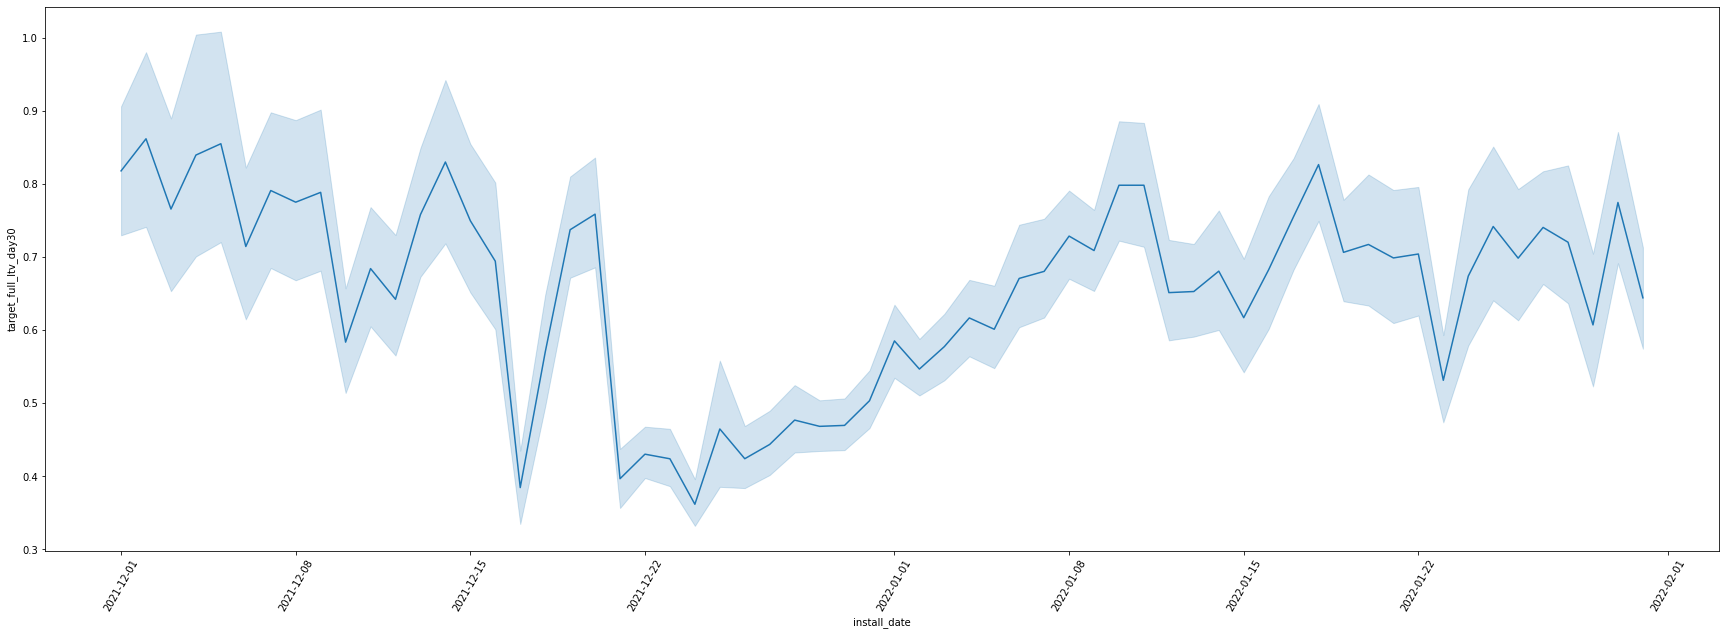

In [8]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=60)
fig = sns.lineplot(x=install_date, y=target).get_figure()
# fig.savefig("plots/install_date_vs_target_full_ltv.jpeg")

In [9]:
target_vs_date = pd.DataFrame({"target": target, "date": install_date})
target_vs_date.head()

target       date
0     0.0 2021-12-03
1     0.0 2021-12-03
2     0.0 2021-12-03
3     0.0 2021-12-03
4     0.0 2021-12-03

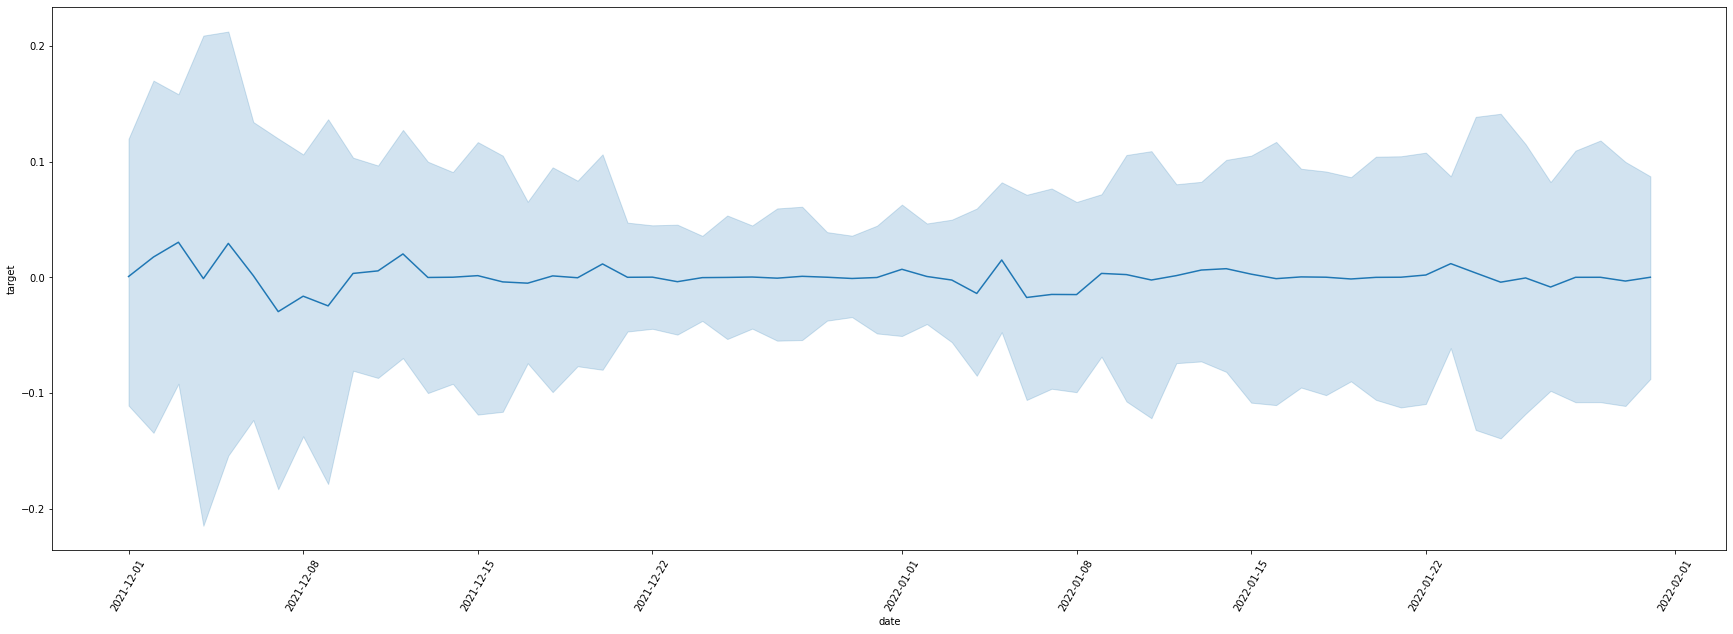

In [10]:
diff_target_vs_date = target_vs_date.diff()
diff_target_vs_date["date"] = target_vs_date["date"]

plt.figure(figsize=(30, 10))
plt.xticks(rotation=60)
fig = sns.lineplot(x=diff_target_vs_date["date"], y=diff_target_vs_date["target"]).get_figure()
# fig.savefig("plots/diff_install_date_vs_target_full_ltv.jpeg")

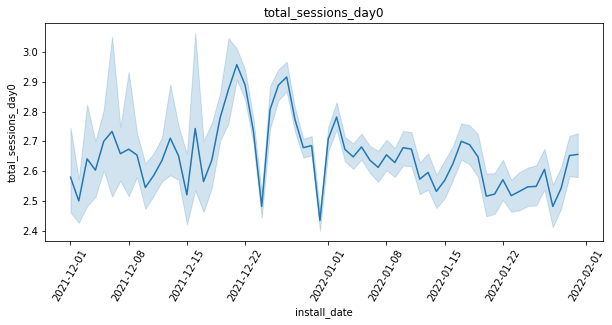

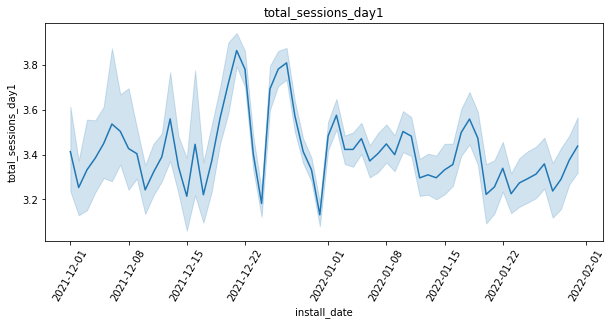

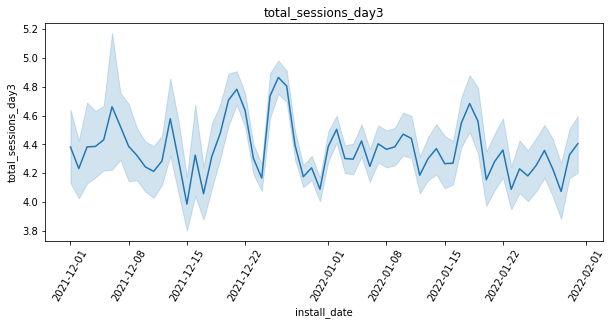

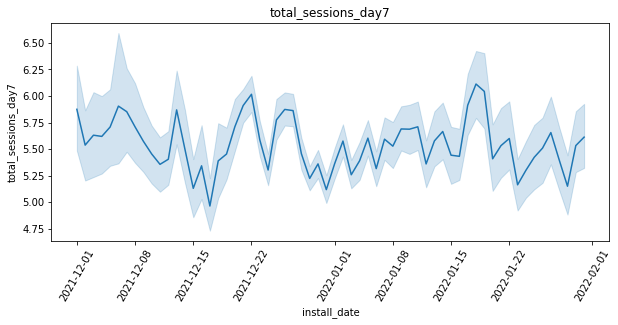

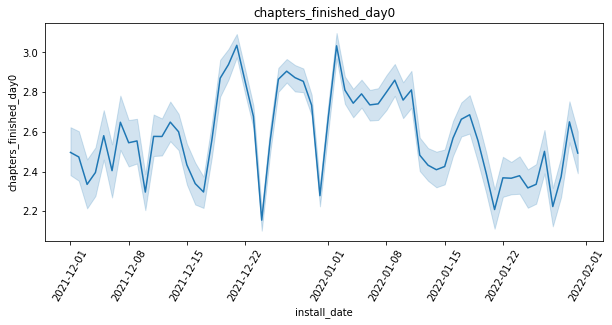

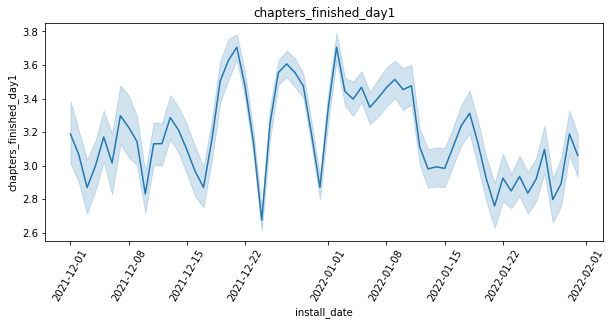

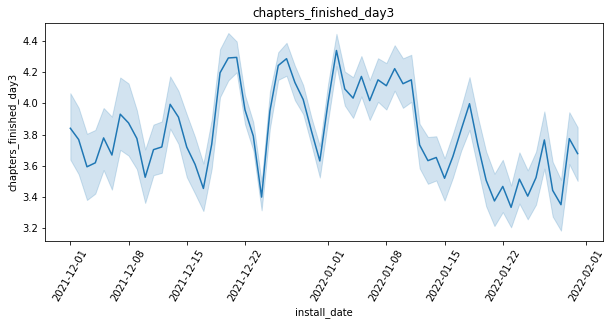

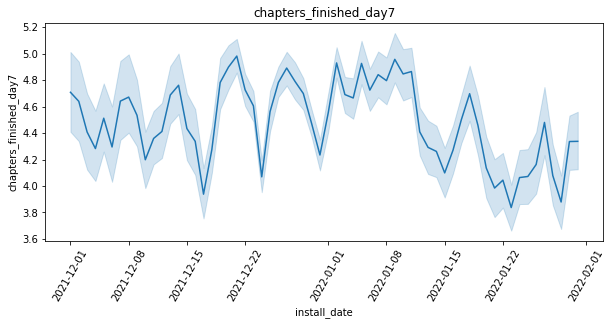

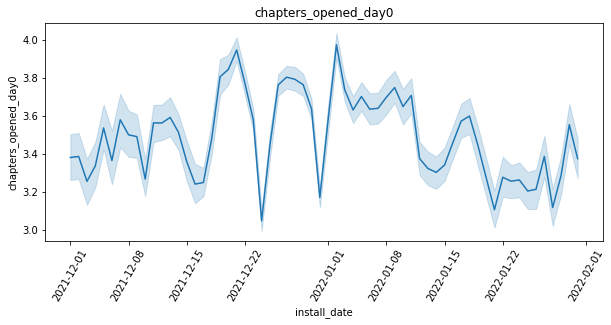

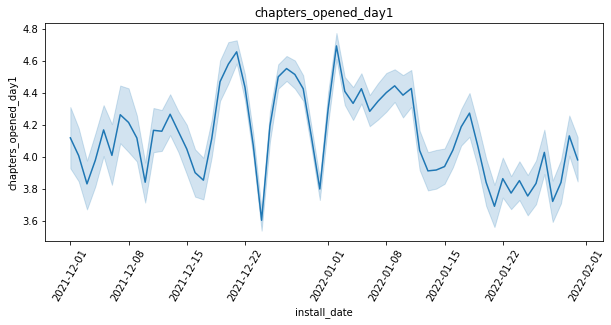

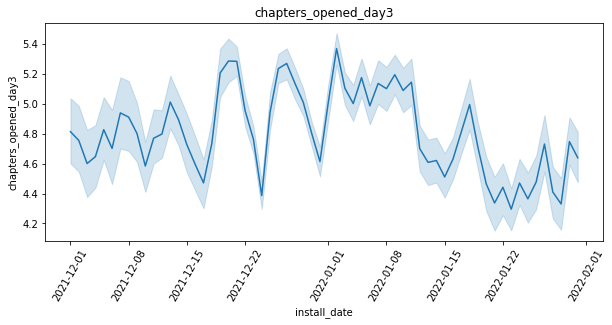

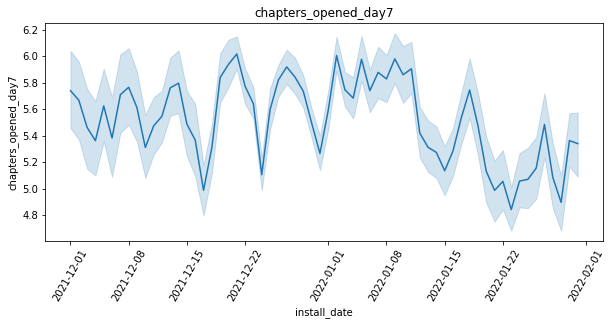

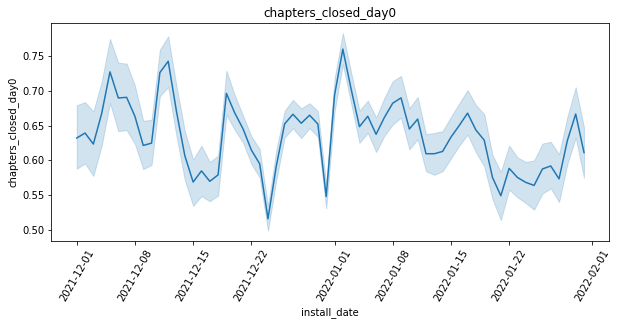

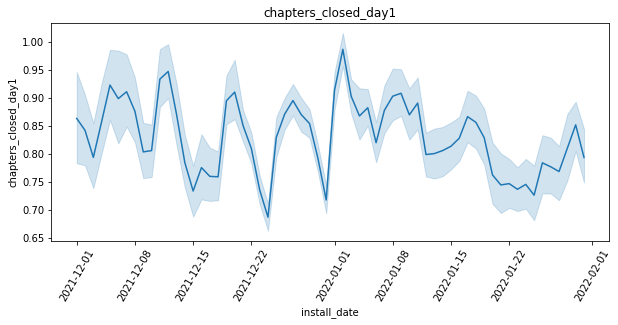

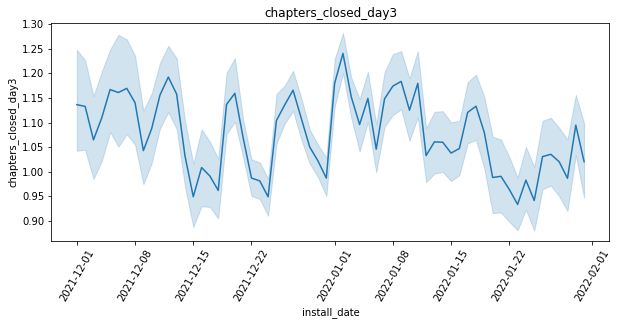

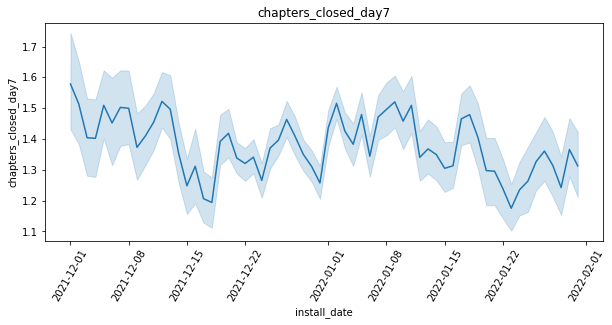

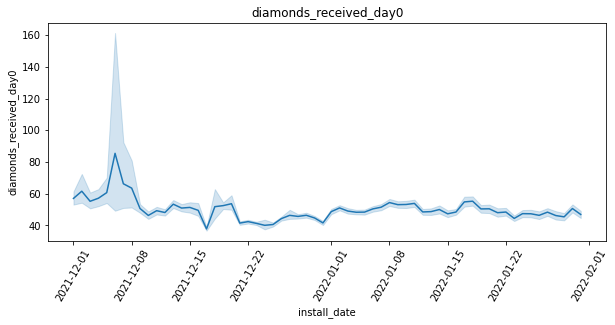

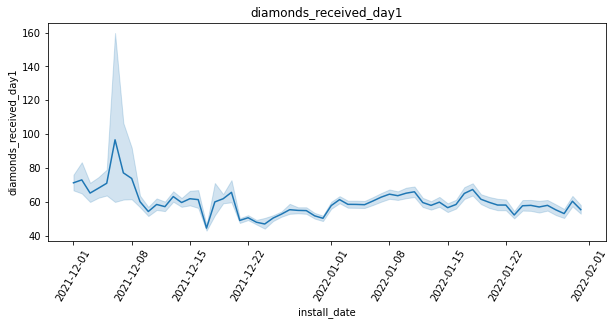

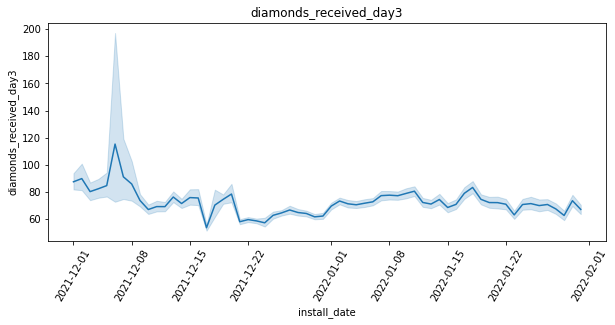

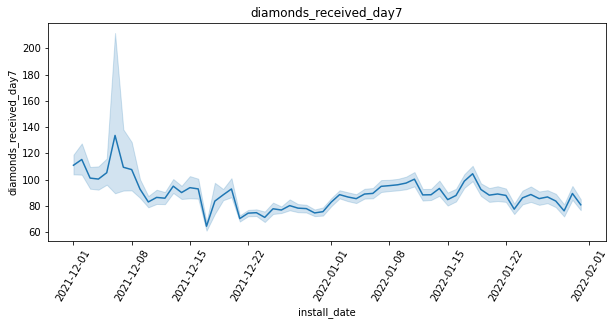

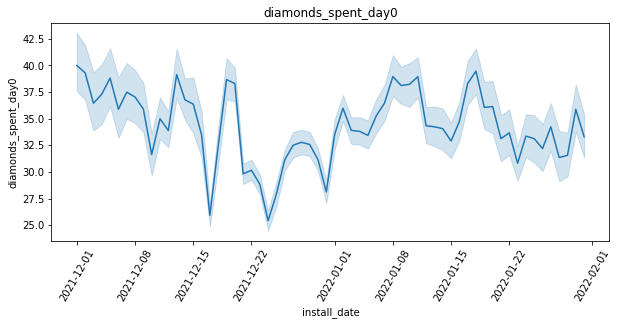

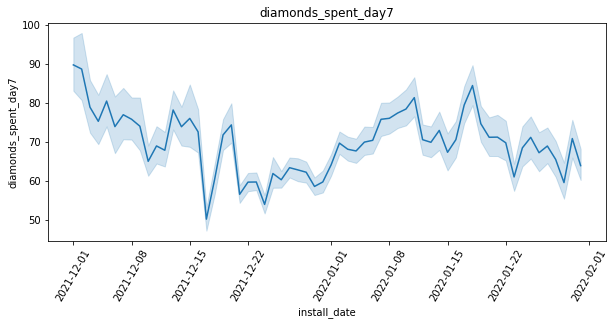

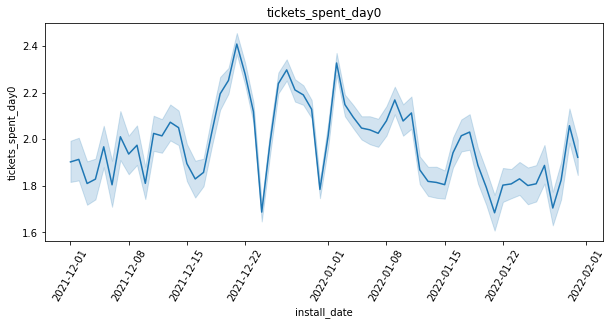

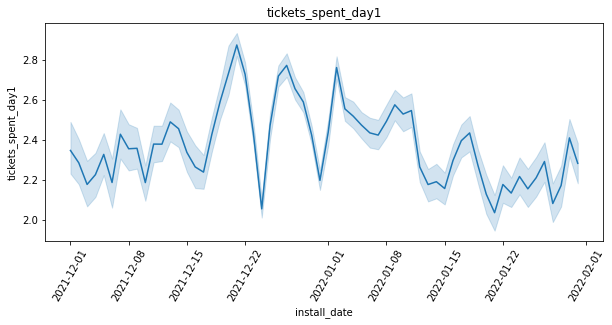

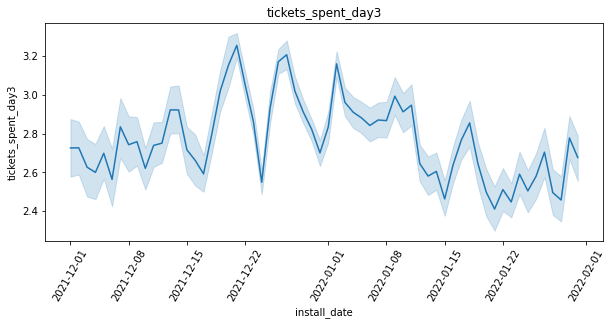

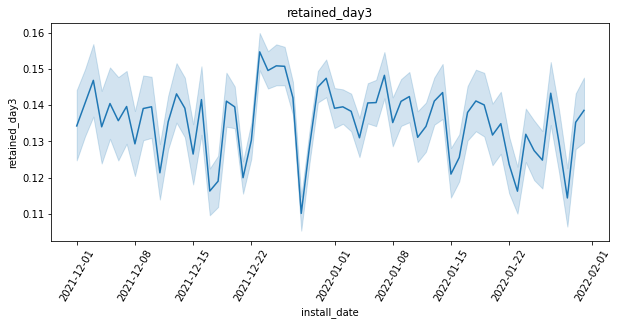

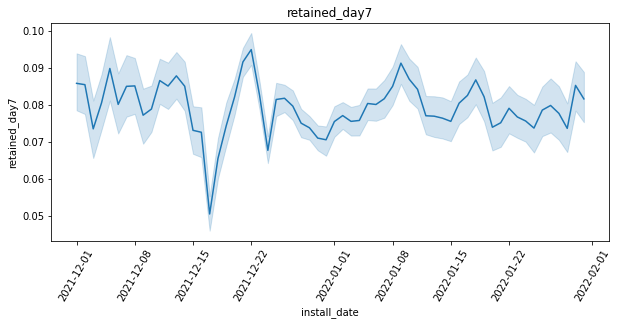

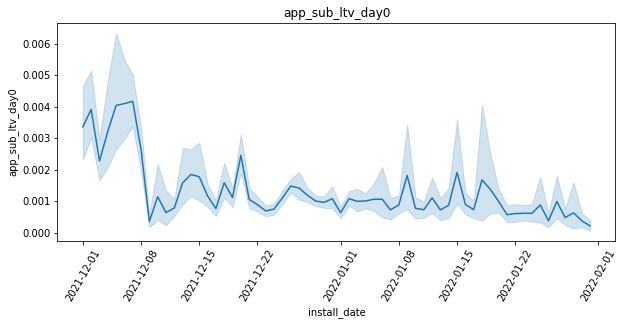

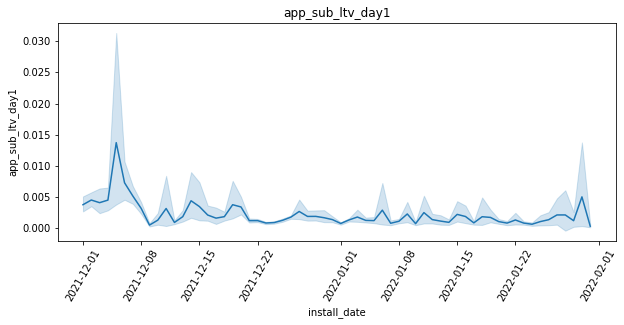

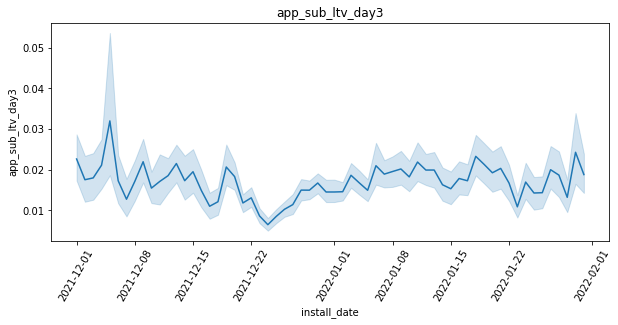

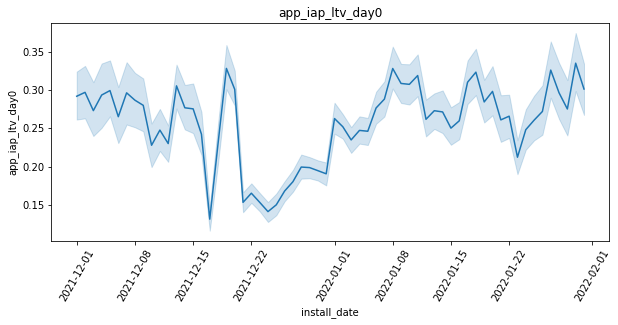

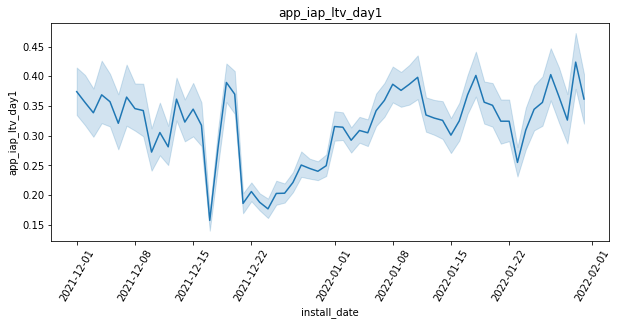

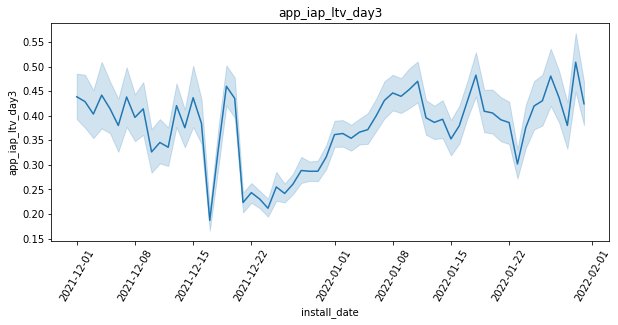

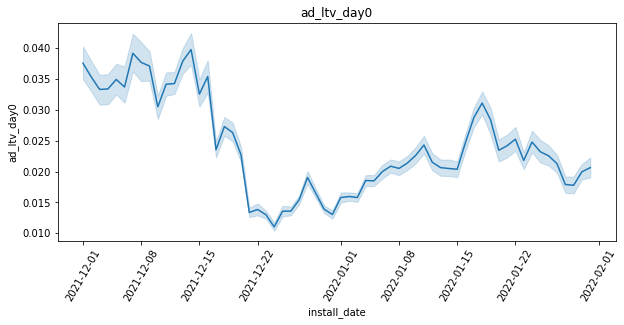

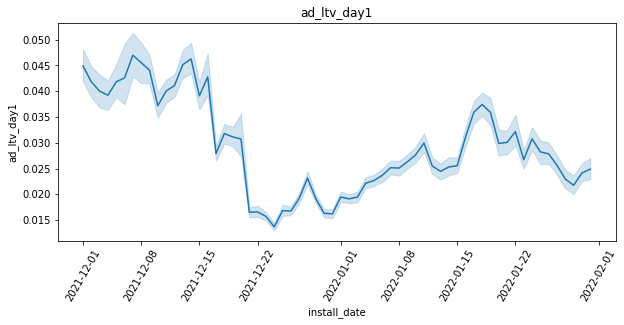

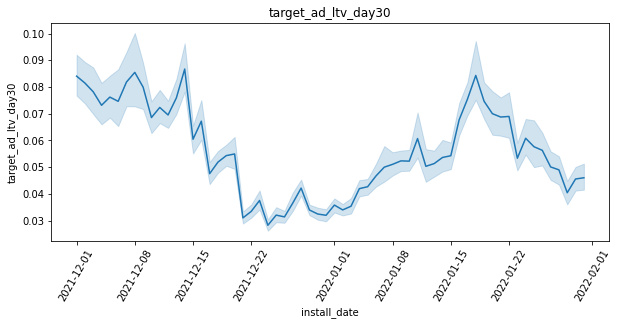

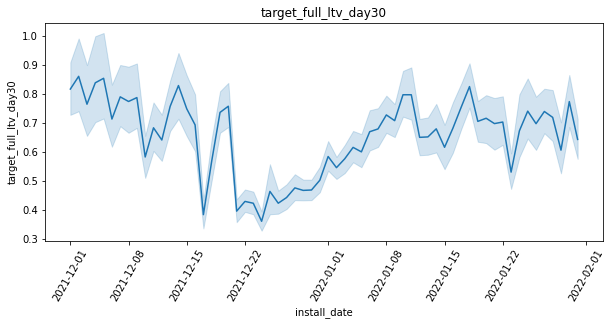

In [11]:
def plot_time_series(df: pd.DataFrame, target_name: str) -> None:
    plt.figure(figsize=(10, 4))
    plt.xticks(rotation=60)
    y = df[target_name]
    x = pd.to_datetime(df["install_date"])
    sns.lineplot(x=x, y=y)
    plt.title(target_name)
    plt.show()


for feature_name in features_with_day:
    plot_time_series(filtered_df, feature_name)

In [18]:
def plot_processed_time_series(df: pd.DataFrame, target_name: str, color, diff: int=1) -> None:
    plt.figure(figsize=(10, 4))
    plt.xticks(rotation=60)
    y = df[target_name].diff(diff)
    x = pd.to_datetime(df["install_date"])
    sns.lineplot(x=x, y=y, color=color)
    plt.title(target_name)
    plt.show()

In [14]:
from skits.preprocessing import (ReversibleImputer,
                                 DifferenceTransformer)
from skits.pipeline import ForecasterPipeline
from sklearn.preprocessing import StandardScaler

In [15]:
diff_transformer = DifferenceTransformer(period=1)
pipeline = ForecasterPipeline([
    ('pre_differencer', diff_transformer),
    ('pre_diff_imputer', ReversibleImputer())
])

In [16]:
filtered_df.head(1)

total_sessions_day0  total_sessions_day1  total_sessions_day3  \
0                  1.0                  1.0                  1.0   

   total_sessions_day7  chapters_finished_day0  chapters_finished_day1  \
0                  1.0                       0                       0   

   chapters_finished_day3  chapters_finished_day7  chapters_opened_day0  \
0                       0                       0                     0   

   chapters_opened_day1  ...  install_date  country_code  ad_ltv_day0  \
0                     0  ...    2021-12-03   COUNTRY_135          0.0   

   ad_ltv_day1  ad_ltv_day3  platform  target_sub_ltv_day30  \
0          0.0          0.0       ios                   0.0   

   target_iap_ltv_day30  target_ad_ltv_day30  target_full_ltv_day30  
0                   0.0                  0.0                    0.0  

[1 rows x 63 columns]

In [17]:
test_df = filtered_df.copy()
test_df.set_index("install_date", inplace=True)
test_df.index = pd.to_datetime(test_df.index)
test_df.sort_index(inplace=True)
y = test_df["target_full_ltv_day30"]
y.index.name = "time"
y = y.values
X = y.copy()[:, np.newaxis]
transformed_data = pipeline.fit_transform(X, y)
transformed_data_copy = transformed_data.copy()
transformed_data = pd.Series(transformed_data.flatten())
transformed_data.index = test_df.index
# sns.lineplot(x=transformed_data.index, y=transformed_data)

In [18]:
transformed_data

time
2021-12-01   -0.000003
2021-12-01   -1.678144
2021-12-01   -0.086011
2021-12-01    0.032013
2021-12-01   -0.028303
                ...   
2022-01-31    0.008860
2022-01-31    0.000450
2022-01-31    0.001806
2022-01-31   -0.011117
2022-01-31    0.000000
Length: 627611, dtype: float64

<AxesSubplot:xlabel='time'>

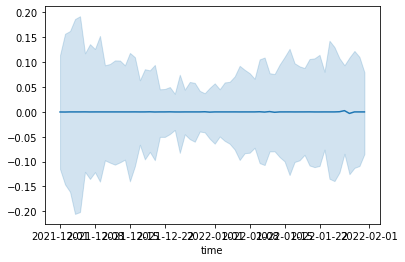

In [19]:
x = transformed_data.index
y = transformed_data.values
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='time'>

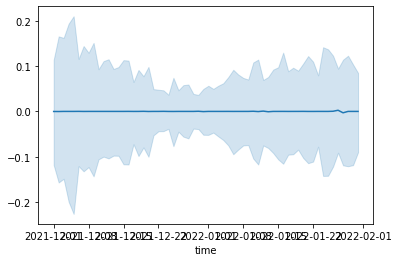

In [20]:
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='time'>

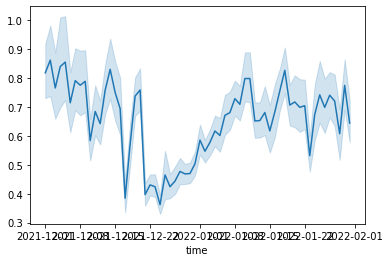

In [21]:
inv_data = diff_transformer.inverse_transform(transformed_data_copy)
inv_data = pd.Series(inv_data.flatten())
inv_data.index = test_df.index
x = inv_data.index
y = inv_data.values
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='install_date', ylabel='target_full_ltv_day30'>

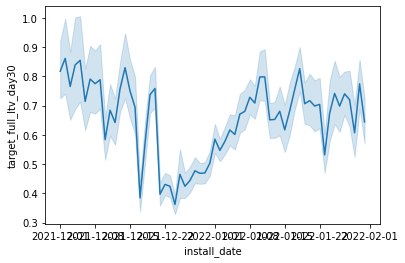

In [22]:
y = filtered_df["target_full_ltv_day30"]
x = pd.to_datetime(filtered_df["install_date"])
sns.lineplot(x=x, y=y)

<AxesSubplot:xlabel='install_date', ylabel='target_full_ltv_day30'>

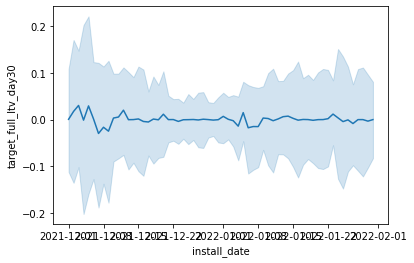

In [23]:
y = filtered_df["target_full_ltv_day30"].diff(1)
x = pd.to_datetime(filtered_df["install_date"])
sns.lineplot(x=x, y=y)